# Exploratory Data Analysis

Nu pratar vi om stickprov och det första som en behöver göra inom EDA är att veta vilken distribution vi har. Något användbart är histogram. 

In [4]:
import pandas as pd
import numpy as np

adv = pd.read_csv("../data/Advertising.csv", index_col=0)
adv.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


25 % av alla värden är under 74.375 för TV. Framförallt använder vi describe() för att se så att antalet rader i varje kolumn är samma. 

## Histogram

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'radio'}>],
       [<Axes: title={'center': 'newspaper'}>,
        <Axes: title={'center': 'sales'}>]], dtype=object)

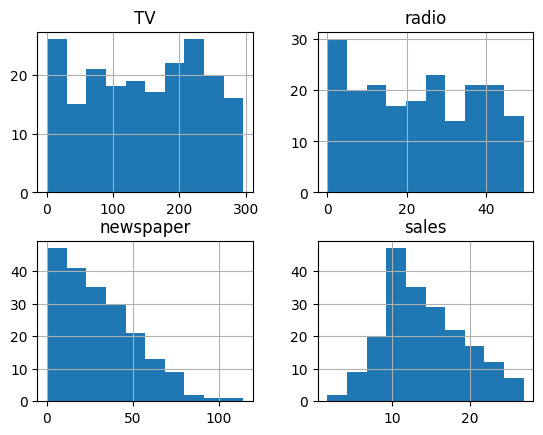

In [5]:
adv.hist() #relativ frekvens histogram

Dessa följer alltså täthetsfunktionen om det är en viss distribution. Den enda distribution som ser normal ut här är sales. Datan delas upp i diskreta intervall och försöker delas in i rättvist, det är vad histogram gör. y-axis är alltså count medan x-axis är våra intervall. Om vi ska använda linjär regression måste sales vara normaldistribuerad. 

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'radio'}>],
       [<Axes: title={'center': 'newspaper'}>,
        <Axes: title={'center': 'sales'}>]], dtype=object)

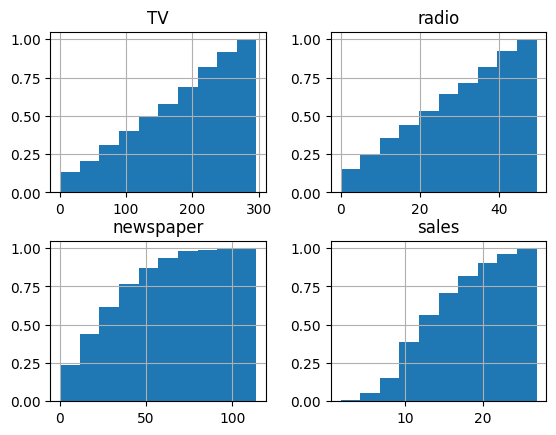

In [6]:
adv.hist(cumulative=True, density=1)

Fördelningsfunktionen. Lutningen är vår sannolikhetsfunktion. Det börjar se ut som att newspaper har en geometrisk distribution. För en normalfördelning ska fördelningsfunktionen ha en S-form vilket vi nästan kan ana för sales.  

Histogramberäkningarna under utan kan också göra att distributionen döljs så det gäller att vara varse. 

In [ ]:
df = pd.DataFrame(np.column_stack([np.random.gamma(2,1,size=100)]))

Kraven och villkoren på sannolikhetsfunktion gör att alla distributioner är besläktade och beroende på vilka parametrar de har övergår de i varandra. Det gör det svårt att finna distributionen via ett histogram. Vad vi är ute efter är att vår responsvariabel y är normalfördelad (helst alla förstås) för att en linjär regression ska fungera bra.  

## Boxplot

<Axes: >

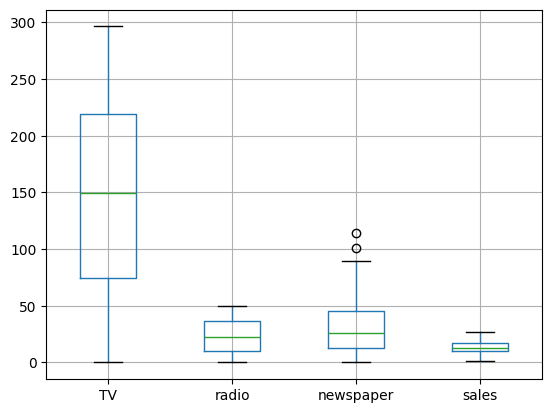

In [7]:
adv.boxplot()

Boxplot är test mot normalfördelning, jämför med normaldistribution. Botten av TV är "25 % av alla värden är under denna linje", den övre boxkanten är 75 % av alla är under här. Strecket i mitten är medlet. Ringarna är outliers. Om den är normalfördelad hamnar alla värden innanför de yttre strecken. 

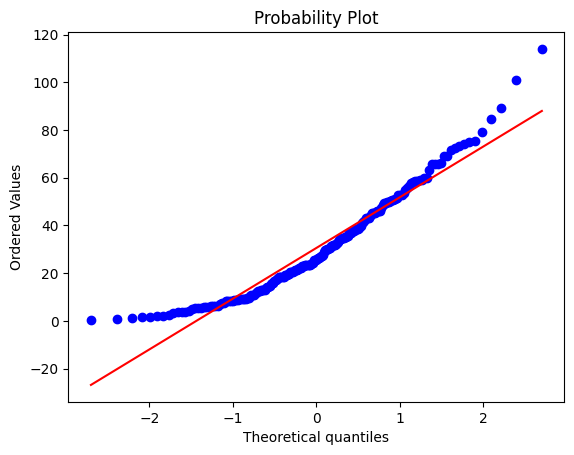

In [15]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate a probability plot for the 'sales' column
stats.probplot(adv['newspaper'], dist="norm", plot=plt)
plt.show()

In [16]:
adv.corr()  # detta är pearson-nr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


# Stuff

[se bild]

$S²$ is an unbiased estimator for $\sigma^2$ but $\sqrt{S^2}$ is not an unbiased estimator of $\sigma$.  

Solution:  
Standard error of the mean (standardavvikelsen i medlet)  

$Var\overline{X} = \frac{\sigma^2}{n}$  

[dubbelkolla vad Raphael sa här om träning och tester]  

In machine learning we use RSE on val/test data -> tighter inerval on smaller n  

$RSE = \sqrt{\frac{1}{n-2} * SSE}$  

Use $\beta$ from train but calculate SSE on test. 